In [1]:
!pip install shap

In [14]:
import pandas as pd
import shap
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [15]:
datasets = ["Grouping_Datasets/Female_Older.csv", 
            "Grouping_Datasets/Female_Younger.csv", 
            "Grouping_Datasets/Male_Older.csv", 
            "Grouping_Datasets/Male_Younger.csv"]

param_grid = {
    "learning_rate": 0.1,
    "n_estimators": 50,
    "max_depth": 4,
    "min_samples_split": 1500}

Processing Grouping_Datasets/Female_Older.csv...


/tmp/ipykernel_951/1037825403.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_results = pd.concat([all_results, pd.DataFrame({


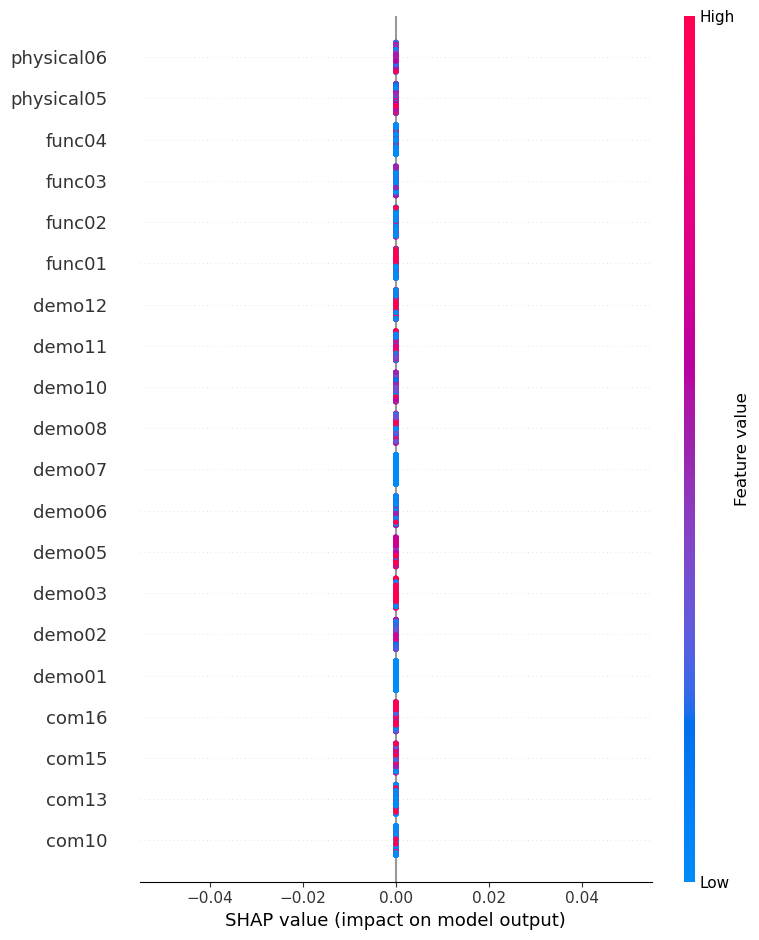


Evaluation Results:
                              Dataset        MSE      RMSE
0  Grouping_Datasets/Female_Older.csv  19.549717  4.421506
Processing Grouping_Datasets/Female_Younger.csv...


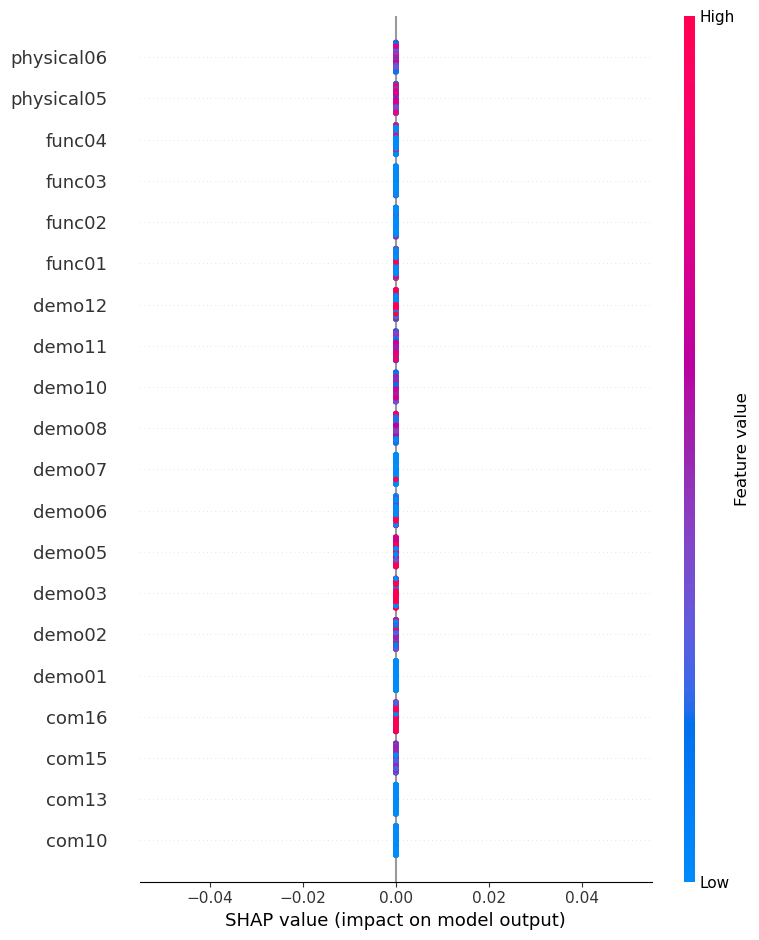


Evaluation Results:
                                Dataset        MSE      RMSE
0    Grouping_Datasets/Female_Older.csv  19.549717  4.421506
1  Grouping_Datasets/Female_Younger.csv  24.289667  4.928455
Processing Grouping_Datasets/Male_Older.csv...


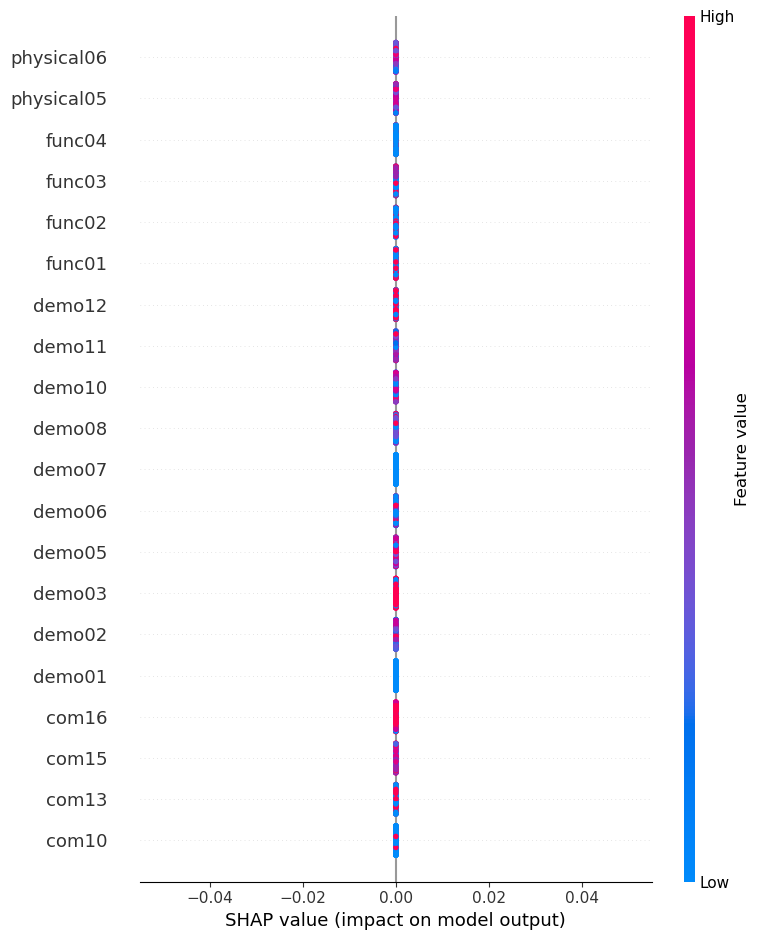


Evaluation Results:
                                Dataset        MSE      RMSE
0    Grouping_Datasets/Female_Older.csv  19.549717  4.421506
1  Grouping_Datasets/Female_Younger.csv  24.289667  4.928455
2      Grouping_Datasets/Male_Older.csv  15.473209  3.933600
Processing Grouping_Datasets/Male_Younger.csv...


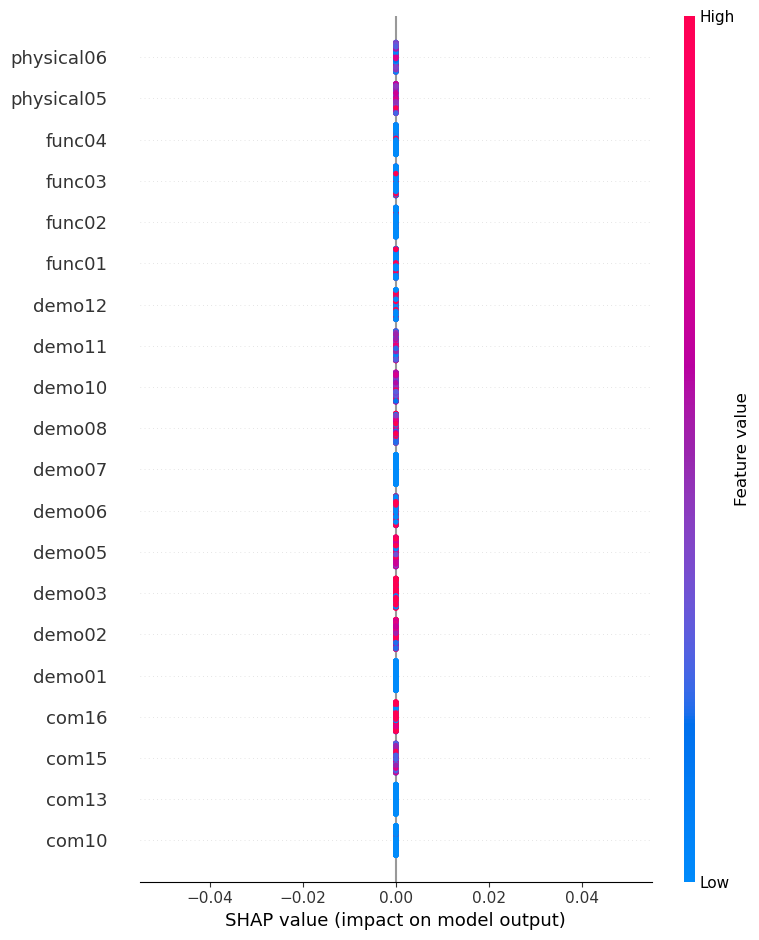


Evaluation Results:
                                Dataset        MSE      RMSE
0    Grouping_Datasets/Female_Older.csv  19.549717  4.421506
1  Grouping_Datasets/Female_Younger.csv  24.289667  4.928455
2      Grouping_Datasets/Male_Older.csv  15.473209  3.933600
3    Grouping_Datasets/Male_Younger.csv  26.062873  5.105181


In [21]:
all_results = pd.DataFrame(columns=["Dataset", "MSE", "RMSE"])

for dataset in datasets:
    print(f"Processing {dataset}...")
    
    data = pd.read_csv(dataset, index_col=0)
    
    X = data.drop(columns=["phq_sum"])
    y = data["phq_sum"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state=42)
    
    gb_model = GradientBoostingRegressor(
        learning_rate=param_grid["learning_rate"],
        n_estimators=param_grid["n_estimators"],
        max_depth=param_grid["max_depth"],
        min_samples_split=param_grid["min_samples_split"],
        random_state=42)
    
    gb_model.fit(X_train, y_train)
    
    y_test_pred = gb_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mse_test ** (1/2) 
    
    
    all_results = pd.concat([all_results, pd.DataFrame({
        "Dataset": [dataset],
        "MSE": [mse_test],
        "RMSE": [rmse_test]})], ignore_index=True)
    
    # SHAP Analysis
    explainer = shap.Explainer(gb_model, X_train)
    shap_values = explainer(X_test)

    # Print SHAP summary plot
    shap.summary_plot(shap_values, X_test)
    
    # Print evaluation results
    print("\nEvaluation Results:")
    print(all_results)

### Hyperparameter Tuning